In [1]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
pd.__version__

'1.4.2'

In [3]:
!pip install pyarrow

In [4]:
df_january = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')

In [5]:
df_february = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [6]:
df_january.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [7]:
num_columnas = len(df_january.columns)
print("Núm columns:", num_columnas)

Núm columns: 19


In [8]:
#df_january2023['duration'] = df_january2023.tpep_dropoff_datetime - df_january2023.tpep_pickup_datetime

In [9]:
df_january['tpep_pickup_datetime'] = pd.to_datetime(df_january['tpep_pickup_datetime'])
df_january['tpep_dropoff_datetime'] = pd.to_datetime(df_january['tpep_dropoff_datetime'])

df_january['duration'] = (df_january['tpep_dropoff_datetime'] - df_january['tpep_pickup_datetime']).dt.total_seconds() / 60

# Écart-type de la durée
std_duration = df_january['duration'].std()
print(f"Q2.  : {std_duration:.2f} minutos")

Q2.  : 42.59 minutos


In [10]:
df_january

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN,13.983333
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN,19.450000
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN,24.516667
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN,13.000000


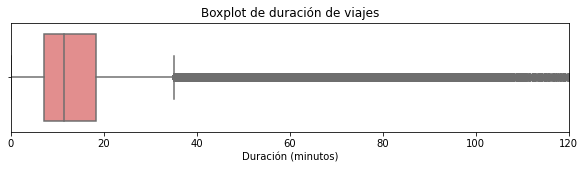

In [11]:
import seaborn as sns

plt.figure(figsize=(10, 2))
sns.boxplot(x=df_january['duration'], color='lightcoral')
plt.title("Boxplot de duración de viajes")
plt.xlabel("Duración (minutos)")
plt.xlim(0, 120)  # Limita el eje para que sea más legible
plt.show()


In [12]:
outliers = df_january[(df_january['duration'] < 1) | (df_january['duration'] > 60)]
print(outliers[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'duration']].head())


    tpep_pickup_datetime tpep_dropoff_datetime   duration
59   2023-01-01 00:22:39   2023-01-01 01:30:45  68.100000
61   2023-01-01 00:42:11   2023-01-01 00:43:02   0.850000
95   2023-01-01 00:20:38   2023-01-01 00:21:26   0.800000
311  2023-01-01 00:12:04   2023-01-01 00:12:27   0.383333
333  2023-01-01 00:57:44   2023-01-01 00:57:59   0.250000


In [13]:
outliers.count()

VendorID                 57593
tpep_pickup_datetime     57593
tpep_dropoff_datetime    57593
passenger_count          56955
trip_distance            57593
RatecodeID               56955
store_and_fwd_flag       56955
PULocationID             57593
DOLocationID             57593
payment_type             57593
fare_amount              57593
extra                    57593
mta_tax                  57593
tip_amount               57593
tolls_amount             57593
improvement_surcharge    57593
total_amount             57593
congestion_surcharge     56955
airport_fee              56955
duration                 57593
dtype: int64

In [14]:
std_duration = df_january['duration'].std()

print(f"La desviación estándar de la duración de los viajes en enero es: {std_duration:.2f} minutos")

La desviación estándar de la duración de los viajes en enero es: 42.59 minutos


In [15]:
# Número total de registros antes de filtrar
total_original = len(df_january)

# Filtrar viajes con duración entre 1 y 60 minutos
df_january = df_january[(df_january['duration'] >= 1) & (df_january['duration'] <= 60)]

# Número de registros después de filtrar
total_filtrado = len(df_january)

# Calcular la fracción
fraccion = total_filtrado / total_original

print(f"La fracción de registros que quedaron después de eliminar los outliers es: {fraccion:.4f}")


La fracción de registros que quedaron después de eliminar los outliers es: 0.9812


In [16]:
from sklearn.feature_extraction import DictVectorizer
categorial = ['PULocationID', 'DOLocationID']
df_january[categorial] = df_january[categorial].astype(str)

train_dicts = df_january[categorial].to_dict(orient='records')

# DictVectorizer
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

# Dimension
dimensionality = X_train.shape[1]
print(f"Q4. La dimension de la matriz es : {dimensionality}")

/tmp/ipykernel_79519/4150160431.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_january[categorial] = df_january[categorial].astype(str)


Q4. La dimension de la matriz es : 515


In [ ]:
model = LinearRegression()
model.fit(X_train, df_january['duration'])

# Prédiction
y_pred = model.predict(X_train)

# RMSE
mse = mean_squared_error(df_january['duration'], y_pred)
rmse = np.sqrt(mse)
print(f"Q5.  RMSE  : {rmse:.2f}")

In [ ]:
df_february['tpep_pickup_datetime'] = pd.to_datetime(df_february['tpep_pickup_datetime'])
df_february['tpep_dropoff_datetime'] = pd.to_datetime(df_february['tpep_dropoff_datetime'])

df_february['duration'] = (df_february['tpep_dropoff_datetime'] - df_february['tpep_pickup_datetime']).dt.total_seconds() / 60
df_february = df_february[(df_february['duration'] >= 1) & (df_february['duration'] <= 60)]
df_february[categorial] = df_february[categorial].astype(str)
val_dicts = df_february[categorial].to_dict(orient='records')
X_val = dv.transform(val_dicts)

# Prédiction
y_val_pred = model.predict(X_val)

# RMSE
mse_val = mean_squared_error(df_february['duration'], y_val_pred)
rmse_val = np.sqrt(mse_val)
print(f"Q6.  RMSE febrero : {rmse_val:.2f}")